<a href="https://colab.research.google.com/github/kumaramardeep342/Colab-Work/blob/main/Ed_AI__DL_M7_inclass_Classifying_Dog_and_Cat_using_CNN_on_Tensorflow_2_x.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Mount the Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

# Classifying Dog and Cat using CNN on Tensorflow 2.x

##Problem Statement

The Dogs vs. Cats dataset is a standard computer vision dataset that involves classifying photos as either containing a dog or cat.

![alt text](https://imgur.com/d8Qd1hD.gif)

####**Dataset Description**

The **Dog Vs Cat** image classification dataset consists of 8005 images belonging to 2 classes for training images and 2023 images belonging to 2 classes for testing images


1.   Class I = Dog
2.   Class II= Cat

####**Summary of  the Notebook**

- Install Tensorflow 2.x
- Import the required libraries - tensorflow
- Read the dataset - Understanding - Preprocessing
- Split the dataset to training and testing[Already Done]
- Create a Model
- Check accuracy - validation
-  Tune Parameters
- Accuracy - validation

# Model Classifying Dog and Cat using CNN on Tensorflow 2.x

##Installing TensorFlow

In [2]:
! pip install tensorflow # install tensorflow library

In [3]:
# verify installation
import tensorflow as tf  #importing tensorflow
from tensorflow import keras #fatser imlementation tensorflow

#check tf.keras version
print(tf.__version__)

2.15.0


## Import the required libraries - tensorflow

In [4]:
#enable table format
from google.colab import data_table
data_table.enable_dataframe_formatter()

#disable table format
# from google.colab import data_table
# data_table.disable_dataframe_formatter()

import pandas as pd  # for reading the dataset
import numpy as np  # for mathematical operations

import matplotlib.pyplot as plt # plotting
import matplotlib.image as mpimg # image processing

from tensorflow.keras.preprocessing.image import ImageDataGenerator # for data augmentation
# preprocessing : resize the image, generate more images from given images,zomm the images
from tensorflow.keras.models import Sequential # type of model for coding
from tensorflow.keras.layers import Conv2D,Activation,MaxPooling2D,Flatten,Dense,Dropout ,BatchNormalization,GlobalMaxPooling2D #Dense:Fully Connected
# Conv2D() - Convolutional layer (to extract features from the images)
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.preprocessing import image # for image processing

from keras import layers
from keras import optimizers
from keras.applications import VGG16
from keras.models import Model

##Preparing the Data

###Loading the Data

In [5]:
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2024-07-27 11:14:03--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.64.18, 2620:100:6035:18::a27d:5512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.64.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873 [following]
--2024-07-27 11:14:04--  https://www.dropbox.com/scl/fi/1gen23zil5ni7ffhtiur1/training_set.zip?rlkey=royd23vjl40u1r59vzobpa873
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc2ef417f7d2c2da2d98c3d0f55e.dl.dropboxusercontent.com/cd/0/inline/CXe1USRuw0Tt_gvS2qKDA-SX0eXmW3MJ3LJMbJ_meAhE3p1reTA0gtSjadvBla3fZlD6SX3QsxleRodI7ZQILtwPFeCY5I_UjcDee7U3yfmX9fFb3WAxpSsfJPbQ_wsdu5hnjLOpan8U8pDM3dYE1Rvl/file# [following]
--2024-07-27 11:14:05--  https://uc2ef417f7d2c2da2d98c3d0f55e.dl.dropboxusercontent.co

### <b> Unzip the  Data

In [6]:
!unzip training_set.zip
!unzip test_set.zip

Streaming output truncated to the last 5000 lines.
  inflating: training_set/training_set/cats/cat.3704.jpg  
  inflating: training_set/training_set/cats/cat.3705.jpg  
  inflating: training_set/training_set/cats/cat.3706.jpg  
  inflating: training_set/training_set/cats/cat.3707.jpg  
  inflating: training_set/training_set/cats/cat.3708.jpg  
  inflating: training_set/training_set/cats/cat.3709.jpg  
  inflating: training_set/training_set/cats/cat.371.jpg  
  inflating: training_set/training_set/cats/cat.3710.jpg  
  inflating: training_set/training_set/cats/cat.3711.jpg  
  inflating: training_set/training_set/cats/cat.3712.jpg  
  inflating: training_set/training_set/cats/cat.3713.jpg  
  inflating: training_set/training_set/cats/cat.3714.jpg  
  inflating: training_set/training_set/cats/cat.3715.jpg  
  inflating: training_set/training_set/cats/cat.3716.jpg  
  inflating: training_set/training_set/cats/cat.3717.jpg  
  inflating: training_set/training_set/cats/cat.3718.jpg  
  infl

- key All to finish the unzipping.

### <b> Visualize the  Data

Populating the interactive namespace from numpy and matplotlib


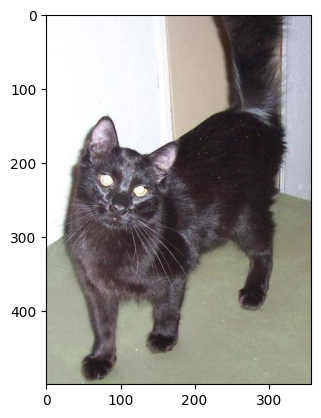

In [7]:
#print output in jupyter notebook instead of opening new window then print
%pylab inline
img=mpimg.imread('/content/training_set/training_set/cats/cat.1021.jpg')
imgplot=plt.imshow(img)
plt.show()

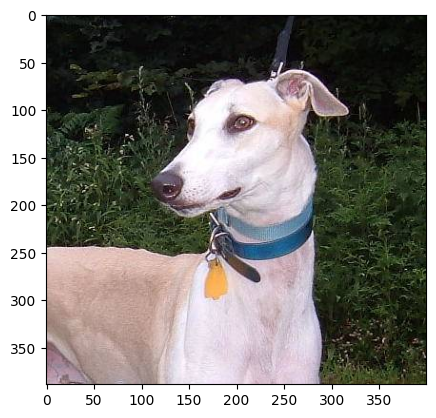

In [8]:
#print output in jupyter notebook instead of opening new window then print
img=mpimg.imread('/content/training_set/training_set/dogs/dog.3999.jpg')
imgplot=plt.imshow(img)
plt.show()

- image sizes of cat and dogs are different. then it is necessary to make all of them as same size.

### <b> Initialize the parameters

In [9]:
img_width,img_height = 150,150  #width and height of the images
train_data_dir = r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample =100 #preprocessing
nb_validation_samples =100
epochs =20
batch_size= 20 #model training

### <b> Check & Change the shape of the image

In [10]:
import tensorflow.keras.backend as k
#150x150x3
#img_width, img_height , no.of channels -- backend is configured
#3,150,150 #RGB - channels - RGB layer [R,G,B]
#150x150x3 [rgb]
if k.image_data_format() == 'channels_first' : #3x150x150
  input_shape = (3,img_width,img_height) # openCv pick this one
else:
  input_shape = (img_width,img_height,3) # tensorflow pick this one

### <b> Generate Images to train the model

1.   Rescale
2.   Shear_range
3.   Zoom_range
4.  Horizontal_flip

![alt text](https://i.imgur.com/Az24gjL.png)


- This class allows to configure random transformations and normalization on the allocated image during training time
- Prevents overfitting and helps to generate a generalize model
- Never repeats the exact same images twice  to train our model

In [11]:
train_datagen=ImageDataGenerator(rescale=1./255, # 255 rgb value range and to normalize the  input data
                                 shear_range = 0.05, #titling the images by an angle
                                 zoom_range = 0.2, #zoom the images by 20%
                                 horizontal_flip = True)
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'binary', #binary classification
    classes = ['cats','dogs']
)

#Now this, will generate training generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 32 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size = (img_width,img_height),
    batch_size = batch_size,
    class_mode = 'binary' #binary classification
)

#Now, this will generate testing generator data
#Target_size = mentioned image_width and image_height
#Batch_size = 32 (already mentioned)
#Class_mode = binary(because here only two classes are there to classify)

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


###**Visual Representation of ImageDataGenerator**

<function matplotlib.pyplot.show(close=None, block=None)>

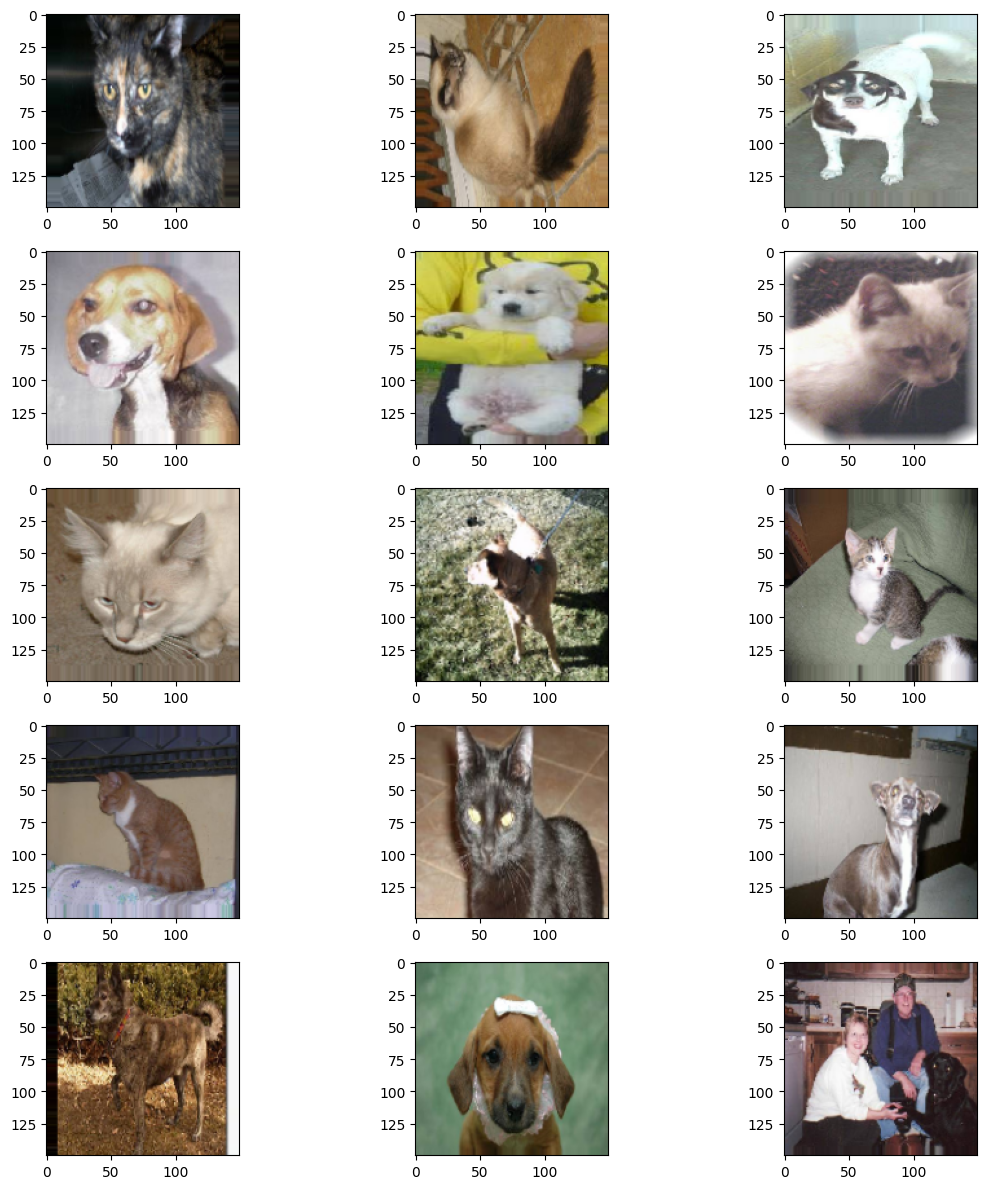

In [12]:
plt.figure(figsize=(12,12))
for i in range(0,15):
  plt.subplot(5,3,i+1)
  for X_batch , Y_batch in train_generator:
    images = X_batch[0]
    plt.imshow(images)
    break
plt.tight_layout()
plt.show

## Designing the CNN Model

### <b> Build the basic CNN model

<b>

1.   Conlutional Layer
2.   ReLu
3. Pooling Layer
4. Fully Connected Layer (Dense)

img source  : towardsdatascience.com

![alt text](https://miro.medium.com/v2/resize:fit:720/format:webp/1*vkQ0hXDaQv57sALXAJquxA.jpeg)

In [13]:
# Model Building

model= Sequential() # seqential composition
# add a layer : Dense , Dropout , activation and cnn work better for images
model.add(Conv2D(16,(3,3),input_shape=input_shape))
# Conv2D for images , Conv3D for video
# Convultional layers -  with 16 filter/feature of 3 height and 3 width and height and width will be always odd number.
# This class allows to create convoluional neural network to extract feature from images
# INPUT : 150x150x3
# CONV : 16 filters/feature , 3x3
# Output : 148x148x16

model.add(Activation('relu')) #148x148x16
model.add(MaxPooling2D(pool_size=(2,2))) #MaxPooling2D helps to reduce the size of the data
#7x7x3 _max pooling size _ output:4x4x3
#148x148x16_max pooling size_output:74x74x16
# it's divides size by 2 as it is MaxPooling 2D

model.add(Flatten()) # converts multi dimenional array to 1D channel

model.add(Dense(1024)) #1024
#number of output nodes in the hidden layer
model.add(Activation('relu'))

model.add(Dense(32))
model.add(Activation('relu'))

model.add(Dense(1)) #output layer - 0, dog -1
model.add(Activation('sigmoid'))  #binary classifier

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 activation (Activation)     (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 1024)              89719808  
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                        

In [14]:
#Compile
model.compile(optimizer='adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
model.summary()

# 2 classes , binary_crossentropy , sigmoid activation is  used
# more than 2 , categorical_crossentropy , softmax is used

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 activation (Activation)     (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 1024)              89719808  
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                        

In [15]:
# train the model
training = model.fit(train_generator,
                     steps_per_epoch = nb_train_sample,epochs=10,
                     validation_data=validation_generator,
                     validation_steps=nb_validation_samples)

#overfitting : when training accuracy is higher than val_accuracy[2%]
#underfitting : when val_accuracy is higher than training accuracy[2%]
#appropriate : abs(training accuracy-val_accuracy ) ~ 2%

Epoch 1/10
100/100 [==============================] - 25s 204ms/step - loss: 1.6922 - accuracy: 0.5481 - val_loss: 0.6558 - val_accuracy: 0.6205
Epoch 2/10
100/100 [==============================] - 17s 167ms/step - loss: 0.6497 - accuracy: 0.6330 - val_loss: 0.6305 - val_accuracy: 0.6520
Epoch 3/10
100/100 [==============================] - 19s 186ms/step - loss: 0.6192 - accuracy: 0.6474 - val_loss: 0.6051 - val_accuracy: 0.6785
Epoch 4/10
100/100 [==============================] - 20s 204ms/step - loss: 0.5969 - accuracy: 0.6840 - val_loss: 0.5876 - val_accuracy: 0.6885
Epoch 5/10
100/100 [==============================] - 17s 165ms/step - loss: 0.6022 - accuracy: 0.6877 - val_loss: 0.6219 - val_accuracy: 0.6640
Epoch 6/10
100/100 [==============================] - 17s 166ms/step - loss: 0.6003 - accuracy: 0.6745 - val_loss: 0.5862 - val_accuracy: 0.6880
Epoch 7/10
100/100 [==============================] - 19s 186ms/step - loss: 0.5896 - accuracy: 0.6851 - val_loss: 0.6975 - val_ac

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


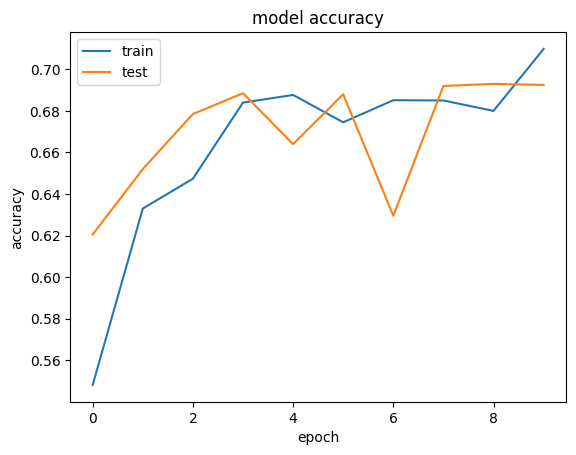

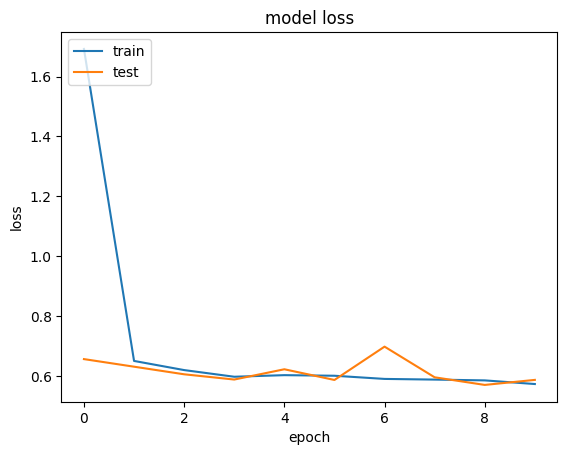

In [16]:
# accuracy visualization

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 158ms/step
[[1.]]
Prediction:  Dog


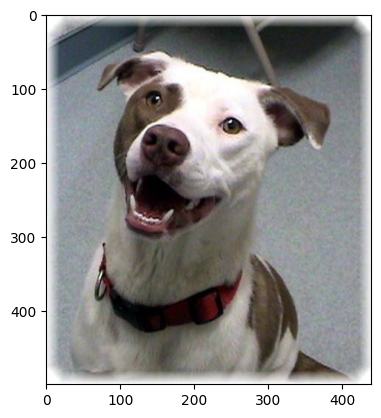

In [17]:
# prediction
img_pred = image.load_img("/content/training_set/training_set/dogs/dog.101.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/training_set/training_set/dogs/dog.101.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 17ms/step
[[1.]]
Prediction:  Dog


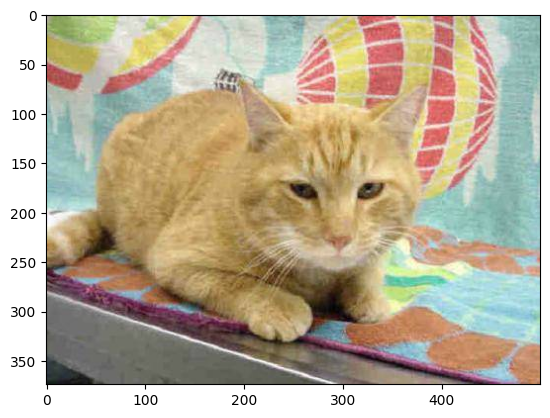

In [18]:
img_pred = image.load_img("/content/training_set/training_set/cats/cat.1019.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/training_set/training_set/cats/cat.1019.jpg')
imgplot = plt.imshow(img)
plt.show()


###Improved Model : Adding Multiple CNN Layer

- Dropout: used to deactive some neurons randomly to prevent overfitting
- Early Stop: To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased
- Learning Rate Reduction: We will reduce the learning rate when then accuracy not increase for 2 steps
- factor: factor by which the learning rate will be reduced. new_lr = lr * factor

In [19]:
# model building
earlystop = EarlyStopping(patience=10)
# ReduceLROnPlateau: Reduce learning rate when a metric has stopped improving

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc',
                                            patience=2,  #patience: number of epochs with no improvement after which learning rate will be reduced.
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

model1 = Sequential()

# input_layer
model1.add(Conv2D(32,(3,3),input_shape=input_shape)) # 32 neurons with 3x3 filters
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# first hidden layer
model1.add(Conv2D(64,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# 2nd st hidden layer
model1.add(Conv2D(128,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# 3rd hidden layer
model1.add(Conv2D(256,(3,3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Dropout(0.25))

# flatten
model.add(Flatten())

model1.add(Dense(512))
model1.add(Activation('relu'))

model1.add(Dropout(0.3)) #Prevents overfitting of the model and it has the effect of reducing the capacity or thinning the network during training

model1.add(Dense(1)) #output layer
model1.add(Activation('sigmoid'))

model1.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 activation_4 (Activation)   (None, 148, 148, 32)      0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 activation_5 (Activation)   (None, 72, 72, 64)        0         
                                                      

In [20]:
#compile
model1.compile(optimizer='adam',
               loss = 'binary_crossentropy',
               metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 activation (Activation)     (None, 148, 148, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 16)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 87616)             0         
                                                                 
 dense (Dense)               (None, 1024)              89719808  
                                                                 
 activation_1 (Activation)   (None, 1024)              0         
                                                        

In [21]:
# train the model
nb_train_sample =32
nb_validation_samples =64
training = model.fit(train_generator,
                     steps_per_epoch = nb_train_sample,epochs=13,
                     validation_data=validation_generator,
                     validation_steps=nb_validation_samples,callbacks=callbacks)

#overfitting : when training accuracy is higher than val_accuracy[2%]
#underfitting : when val_accuracy is higher than training accuracy[2%]
#appropriate : abs(training accuracy-val_accuracy ) ~ 2%

Epoch 1/13
32/32 [==============================] - ETA: 0s - loss: 0.5536 - accuracy: 0.7219

32/32 [==============================] - 6s 194ms/step - loss: 0.5536 - accuracy: 0.7219 - val_loss: 0.5973 - val_accuracy: 0.7063 - lr: 0.0010
Epoch 2/13
32/32 [==============================] - ETA: 0s - loss: 0.5644 - accuracy: 0.6922

32/32 [==============================] - 8s 247ms/step - loss: 0.5644 - accuracy: 0.6922 - val_loss: 0.5888 - val_accuracy: 0.7016 - lr: 0.0010
Epoch 3/13
32/32 [==============================] - ETA: 0s - loss: 0.5819 - accuracy: 0.7047

32/32 [==============================] - 6s 191ms/step - loss: 0.5819 - accuracy: 0.7047 - val_loss: 0.6325 - val_accuracy: 0.6562 - lr: 0.0010
Epoch 4/13
32/32 [==============================] - ETA: 0s - loss: 0.5698 - accuracy: 0.7088

32/32 [==============================] - 6s 185ms/step - loss: 0.5698 - accuracy: 0.7088 - val_loss: 0.5826 - val_accuracy: 0.7031 - lr: 0.0010
Epoch 5/13
32/32 [==============================] - ETA: 0s - loss: 0.5577 - accuracy: 0.6928

32/32 [==============================] - 11s 361ms/step - loss: 0.5577 - accuracy: 0.6928 - val_loss: 0.7201 - val_accuracy: 0.6398 - lr: 0.0010
Epoch 6/13
32/32 [==============================] - ETA: 0s - loss: 0.5483 - accuracy: 0.7172

32/32 [==============================] - 6s 189ms/step - loss: 0.5483 - accuracy: 0.7172 - val_loss: 0.5526 - val_accuracy: 0.7391 - lr: 0.0010
Epoch 7/13
32/32 [==============================] - ETA: 0s - loss: 0.5630 - accuracy: 0.7250

32/32 [==============================] - 6s 204ms/step - loss: 0.5630 - accuracy: 0.7250 - val_loss: 0.5935 - val_accuracy: 0.6961 - lr: 0.0010
Epoch 8/13
32/32 [==============================] - ETA: 0s - loss: 0.5107 - accuracy: 0.7375

32/32 [==============================] - 8s 243ms/step - loss: 0.5107 - accuracy: 0.7375 - val_loss: 0.6196 - val_accuracy: 0.7109 - lr: 0.0010
Epoch 9/13
32/32 [==============================] - ETA: 0s - loss: 0.4732 - accuracy: 0.7750

32/32 [==============================] - 6s 204ms/step - loss: 0.4732 - accuracy: 0.7750 - val_loss: 0.6551 - val_accuracy: 0.7141 - lr: 0.0010
Epoch 10/13
32/32 [==============================] - ETA: 0s - loss: 0.5685 - accuracy: 0.7094

32/32 [==============================] - 8s 249ms/step - loss: 0.5685 - accuracy: 0.7094 - val_loss: 0.5993 - val_accuracy: 0.7008 - lr: 0.0010
Epoch 11/13
32/32 [==============================] - ETA: 0s - loss: 0.5347 - accuracy: 0.7312

32/32 [==============================] - 7s 205ms/step - loss: 0.5347 - accuracy: 0.7312 - val_loss: 0.8297 - val_accuracy: 0.6391 - lr: 0.0010
Epoch 12/13
32/32 [==============================] - ETA: 0s - loss: 0.5638 - accuracy: 0.7172

32/32 [==============================] - 7s 208ms/step - loss: 0.5638 - accuracy: 0.7172 - val_loss: 0.5856 - val_accuracy: 0.6906 - lr: 0.0010
Epoch 13/13
32/32 [==============================] - ETA: 0s - loss: 0.5494 - accuracy: 0.7453

32/32 [==============================] - 6s 195ms/step - loss: 0.5494 - accuracy: 0.7453 - val_loss: 0.6071 - val_accuracy: 0.6852 - lr: 0.0010


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


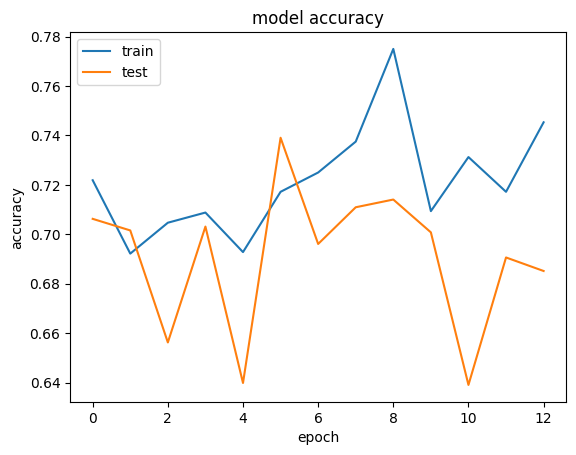

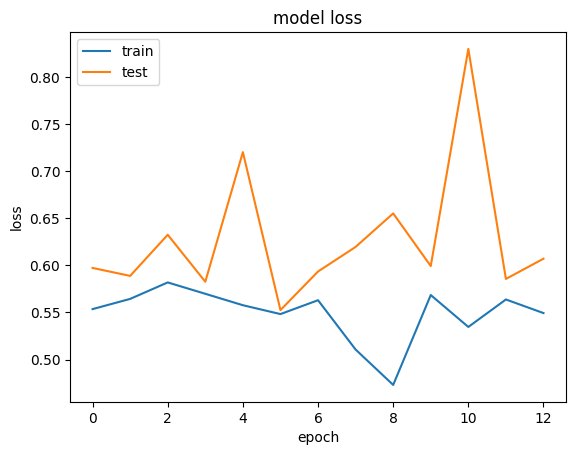

In [22]:
# accuracy visualization

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 34ms/step
[[1.]]
Prediction:  Dog


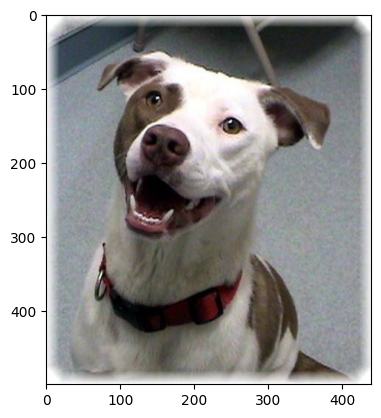

In [23]:
# prediction
img_pred = image.load_img("/content/training_set/training_set/dogs/dog.101.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/training_set/training_set/dogs/dog.101.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 25ms/step
[[1.]]
Prediction:  Dog


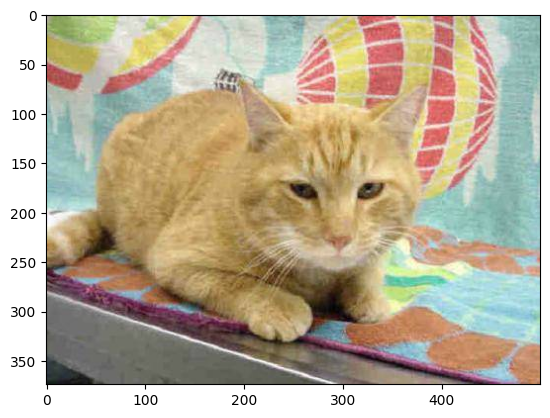

In [24]:
img_pred = image.load_img("/content/training_set/training_set/cats/cat.1019.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/training_set/training_set/cats/cat.1019.jpg')
imgplot = plt.imshow(img)
plt.show()


### <b> Build CNN model 2 using VGG16 pretrained model
- https://www.kaggle.com/code/bulentsiyah/dogs-vs-cats-classification-vgg16-fine-tuning
- https://towardsdatascience.com/step-by-step-vgg16-implementation-in-keras-for-beginners-a833c686ae6c

In [25]:
# model building
image_size = 150
input_shape = (image_size, image_size, 3)

epochs = 20
batch_size = 16

pre_trained_model = VGG16(input_shape=input_shape, include_top=False, weights="imagenet")

for layer in pre_trained_model.layers[:15]:
    layer.trainable = False

for layer in pre_trained_model.layers[15:]:
    layer.trainable = True

last_layer = pre_trained_model.get_layer('block5_pool')
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = GlobalMaxPooling2D()(last_output)
# Add a fully connected layer with 512 hidden units and ReLU activation
x = Dense(512, activation='relu')(x)
# Add a dropout rate of 0.5
x = Dropout(0.5)(x)
# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model2 = Model(pre_trained_model.input, x)

58889256/58889256 [==============================] - 3s 0us/step


In [26]:
# compile
model2.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])

model2.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [27]:
# training the model
training = model2.fit_generator(train_generator,
                   steps_per_epoch=nb_train_sample,epochs=epochs,
                   validation_data=validation_generator,
                       validation_steps=nb_validation_samples,callbacks=callbacks)

<ipython-input-27-944ee1c6ca87>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training = model2.fit_generator(train_generator,


Epoch 1/20
32/32 [==============================] - ETA: 0s - loss: 0.8576 - accuracy: 0.5984

32/32 [==============================] - 15s 289ms/step - loss: 0.8576 - accuracy: 0.5984 - val_loss: 0.6931 - val_accuracy: 0.5031 - lr: 0.0100
Epoch 2/20
32/32 [==============================] - ETA: 0s - loss: 0.6925 - accuracy: 0.5250

32/32 [==============================] - 10s 309ms/step - loss: 0.6925 - accuracy: 0.5250 - val_loss: 0.6939 - val_accuracy: 0.5023 - lr: 0.0100
Epoch 3/20
32/32 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5094

32/32 [==============================] - 11s 334ms/step - loss: 0.6933 - accuracy: 0.5094 - val_loss: 0.6927 - val_accuracy: 0.5156 - lr: 0.0100
Epoch 4/20
32/32 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4875

32/32 [==============================] - 8s 254ms/step - loss: 0.6937 - accuracy: 0.4875 - val_loss: 0.6931 - val_accuracy: 0.5133 - lr: 0.0100
Epoch 5/20
32/32 [==============================] - ETA: 0s - loss: 0.6937 - accuracy: 0.4859

32/32 [==============================] - 8s 246ms/step - loss: 0.6937 - accuracy: 0.4859 - val_loss: 0.6931 - val_accuracy: 0.5078 - lr: 0.0100
Epoch 6/20
32/32 [==============================] - ETA: 0s - loss: 0.6935 - accuracy: 0.5016

32/32 [==============================] - 9s 273ms/step - loss: 0.6935 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5008 - lr: 0.0100
Epoch 7/20
32/32 [==============================] - ETA: 0s - loss: 0.6931 - accuracy: 0.5109

32/32 [==============================] - 10s 322ms/step - loss: 0.6931 - accuracy: 0.5109 - val_loss: 0.6935 - val_accuracy: 0.4977 - lr: 0.0100
Epoch 8/20
32/32 [==============================] - ETA: 0s - loss: 0.6932 - accuracy: 0.5125

32/32 [==============================] - 9s 297ms/step - loss: 0.6932 - accuracy: 0.5125 - val_loss: 0.6945 - val_accuracy: 0.4875 - lr: 0.0100
Epoch 9/20
32/32 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4969

32/32 [==============================] - 17s 556ms/step - loss: 0.6938 - accuracy: 0.4969 - val_loss: 0.6936 - val_accuracy: 0.4898 - lr: 0.0100
Epoch 10/20
32/32 [==============================] - ETA: 0s - loss: 0.6938 - accuracy: 0.4734

32/32 [==============================] - 9s 296ms/step - loss: 0.6938 - accuracy: 0.4734 - val_loss: 0.6932 - val_accuracy: 0.4961 - lr: 0.0100
Epoch 11/20
32/32 [==============================] - ETA: 0s - loss: 0.6933 - accuracy: 0.5156

32/32 [==============================] - 8s 249ms/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6939 - val_accuracy: 0.4977 - lr: 0.0100
Epoch 12/20
32/32 [==============================] - ETA: 0s - loss: 0.6943 - accuracy: 0.4944

32/32 [==============================] - 10s 316ms/step - loss: 0.6943 - accuracy: 0.4944 - val_loss: 0.6930 - val_accuracy: 0.5078 - lr: 0.0100
Epoch 13/20
32/32 [==============================] - ETA: 0s - loss: 0.6941 - accuracy: 0.5047

32/32 [==============================] - 9s 295ms/step - loss: 0.6941 - accuracy: 0.5047 - val_loss: 0.6934 - val_accuracy: 0.4992 - lr: 0.0100


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


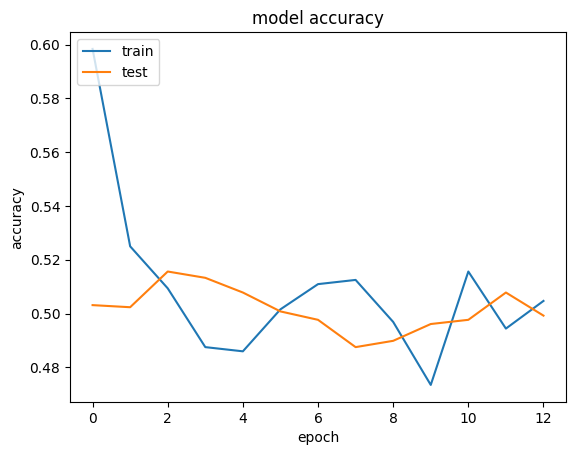

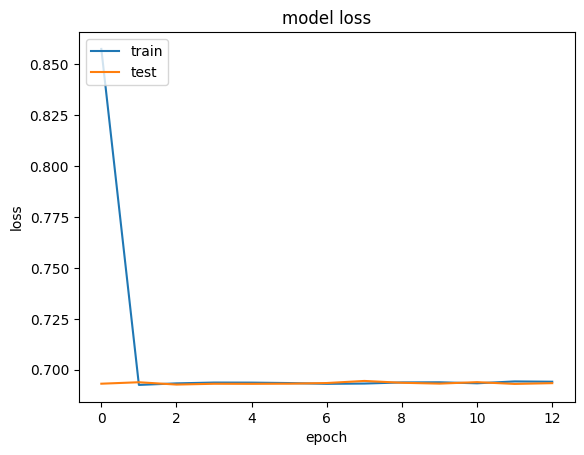

In [28]:
# accuracy visualization

import matplotlib.pyplot as plt
%matplotlib inline
# list all data in training
print(training.history.keys())
# summarize training for accuracy
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize traning for loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

1/1 [==============================] - 0s 18ms/step
[[1.]]
Prediction:  Dog


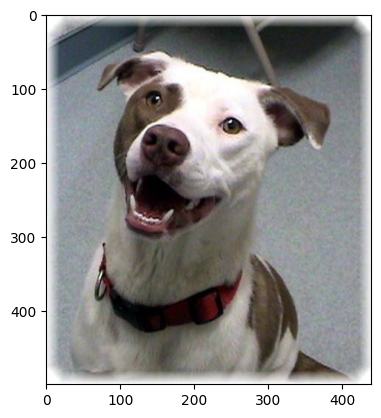

In [29]:
# prediction
img_pred = image.load_img("/content/training_set/training_set/dogs/dog.101.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/training_set/training_set/dogs/dog.101.jpg')
imgplot = plt.imshow(img)
plt.show()


1/1 [==============================] - 0s 54ms/step
[[1.]]
Prediction:  Dog


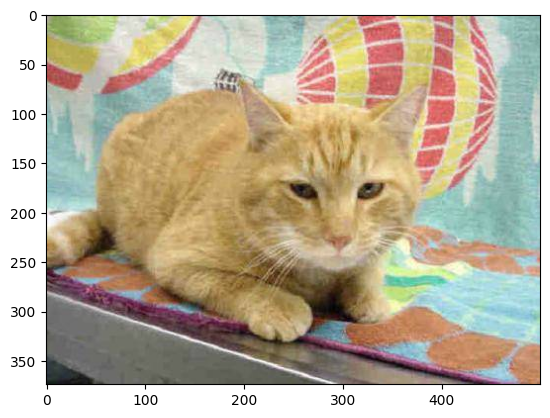

In [30]:
img_pred = image.load_img("/content/training_set/training_set/cats/cat.1019.jpg",target_size=(150,150))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)

rslt = model.predict(img_pred)
print(rslt)
if rslt[0][0]==1:
    prediction ="Dog"
else:
    prediction ="Cat"
print('Prediction: ',prediction)

img=mpimg.imread('/content/training_set/training_set/cats/cat.1019.jpg')
imgplot = plt.imshow(img)
plt.show()
